<a href="https://colab.research.google.com/github/Rohan-crypt/DeepLearning/blob/main/AutoEncodersipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exp: Image Reconstruction and Feature Compression Using Autoencoders

Objective: To design and evaluate a standard autoencoder model for image reconstruction and representation learning using dimensionality reduction techniques in deep neural networks.

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"slurrgoose","key":"3ba83145488ff1772338554ff0f196a3"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d l3llff/flowers

Dataset URL: https://www.kaggle.com/datasets/l3llff/flowers
License(s): CC0-1.0
 59% 134M/228M [00:00<00:00, 1.40GB/s]
100% 228M/228M [00:00<00:00, 963MB/s] 


In [2]:
!unzip flowers.zip -d /content/flowers_dataset

Archive:  flowers.zip
replace /content/flowers_dataset/flowers/astilbe/10091895024_a2ea04cda6_c.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
import os
root_dir = '/content/flowers_dataset'
for dirname, _, filenames in os.walk(root_dir):
    print(dirname, len(filenames))

/content/flowers_dataset 0
/content/flowers_dataset/flowers 0
/content/flowers_dataset/flowers/rose 999
/content/flowers_dataset/flowers/california_poppy 1022
/content/flowers_dataset/flowers/common_daisy 980
/content/flowers_dataset/flowers/bellflower 873
/content/flowers_dataset/flowers/coreopsis 1047
/content/flowers_dataset/flowers/astilbe 737
/content/flowers_dataset/flowers/magnolia 1048
/content/flowers_dataset/flowers/sunflower 1027
/content/flowers_dataset/flowers/calendula 978
/content/flowers_dataset/flowers/daffodil 970
/content/flowers_dataset/flowers/water_lily 982
/content/flowers_dataset/flowers/iris 1054
/content/flowers_dataset/flowers/dandelion 1052
/content/flowers_dataset/flowers/carnation 923
/content/flowers_dataset/flowers/black_eyed_susan 1000
/content/flowers_dataset/flowers/tulip 1048


In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image_size = (128, 128)  # you can choose this
root_dir = '/content/flowers_dataset/flowers'
images = []

# Iterate through each subdirectory (flower type) and its files
for subdir, _, files in os.walk(root_dir):
    for fname in files:
        if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
            img = load_img(os.path.join(subdir, fname), target_size=image_size)
            arr = img_to_array(img) / 255.0
            images.append(arr)

images = np.array(images)
print(images.shape)

(15740, 128, 128, 3)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, _, _ = train_test_split(images, images, test_size=0.2, random_state=42)

print(f"Shape of training data: {X_train.shape}")
print(f"Shape of testing data: {X_test.shape}")

Shape of training data: (12592, 128, 128, 3)
Shape of testing data: (3148, 128, 128, 3)


In [4]:
from tensorflow.keras import layers, models

input_img = layers.Input(shape=(128,128,3))

# ------- Encoder -------
x = layers.Conv2D(8, (3,3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2,2), padding='same')(x)   # 64x64

x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2,2), padding='same', name='latent_space')(x)  # 32x32

# ------- Decoder -------
x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2,2))(x)  # 64x64

x = layers.Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2,2))(x)  # 128x128

decoded = layers.Conv2D(3, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_space (MaxPooling2D)     │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 3)    │           219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,091 (19.89 KB)

 Trainable params: 5,091 (19.89 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = autoencoder.fit(
    X_train, X_train,
    epochs=10,
    batch_size=8,
    validation_data=(X_test, X_test)
)

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

# Normalize + reshape
x_train = x_train.astype("float32") / 255.
x_test  = x_test.astype("float32") / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test, (len(x_test), 28, 28, 1))

print("Train:", x_train.shape)
print("Test:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: (60000, 28, 28, 1)
Test: (10000, 28, 28, 1)


In [2]:
from tensorflow.keras import layers, models

input_img = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(8, (3,3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D(2, padding='same')(x)  # 14×14

x = layers.Conv2D(4, (3,3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D(2, padding='same')(x)  # 7×7 → LATENT

# Decoder
x = layers.Conv2D(4, (3,3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D(2)(x)  # 14×14

x = layers.Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = layers.UpSampling2D(2)(x)  # 28×28

decoded = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 4)      │           292 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 4)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 4)        │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 8)      │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │            73 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 889 (3.47 KB)

 Trainable params: 889 (3.47 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, x_test)
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0699 - val_loss: 0.0116
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0112 - val_loss: 0.0092
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0090 - val_loss: 0.0078
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0079 - val_loss: 0.0072
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0073 - val_loss: 0.0067
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0065 - val_loss: 0.0062
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0063 - val_loss: 0.0061
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0062 - val_loss: 0.0059


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


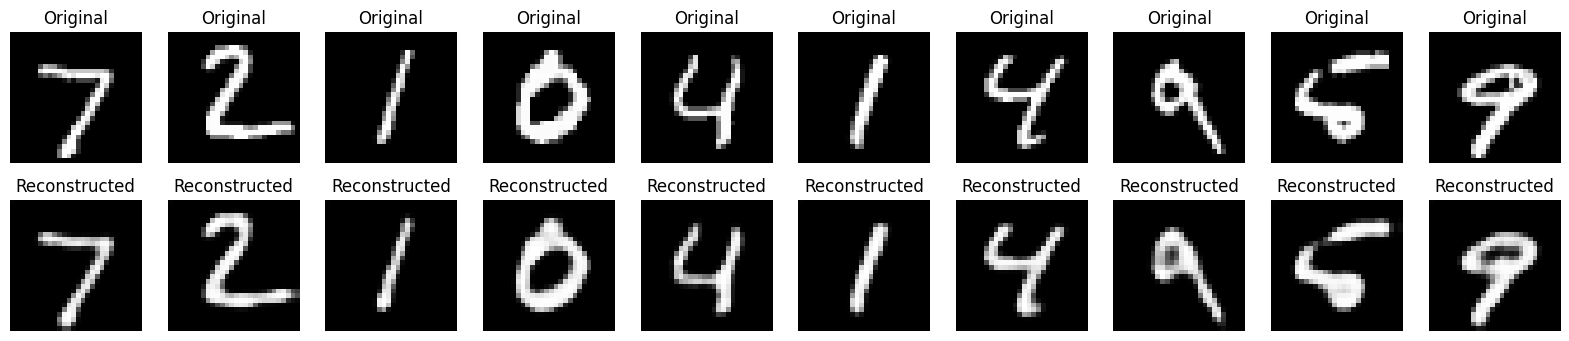

In [4]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test[:10])

plt.figure(figsize=(20,4))

for i in range(10):
    # Original
    ax = plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, 10, 10+i+1)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

In [5]:
encoder = models.Model(input_img, encoded)
latent_vectors = encoder.predict(x_test)

print(latent_vectors.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 7, 7, 4)
